### **Customer Churn Predictions using ANN**

Aim:-

1. The main aim of this project is to predict whether the customer will leave the bank or not by using Artificial Neural Networks.

2. The above process is known as Customer Churn Prediction.


### Steps involved in this Project

1.  Import all the necessary libraries

2.  Load the dataset

3.  Do Exploratory Data Analysis and perform the data preprocessing

4.  Divide the dataset into independent and dependent variables

5.  Divide the independent and dependent variables into training and testing data

6.  Scale the input data in one range

7.  Build the ANN Model

8.  Compile the Model

9.  Train the Model

10. Evaluate the performance of the Model

11. Plot the Accuracy and the loss of the model

12.  Make the prediction, confusion matrix and classification report

13.  Predict for a new customer



### Step 1:  Import all the necessary libraries

In [521]:
import  numpy  as  np
import  pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing   import StandardScaler
from  sklearn.metrics         import accuracy_score, confusion_matrix, classification_report

from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense, Dropout,BatchNormalization

### Step 2: Load the dataset

In [522]:
df = pd.read_csv('/content/Customer_Churn_Modelling.csv')

In [523]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### OBSERVATIONS:

1.  The above dataset contains the list of all the details of the customer.

     (a.)  Inputs -----> RowNumber .... EstimatedSalary

     (b.)  Output -----> Exited (Person leave the bank or not)

### Step 3: Do Exploratory Data Analysis and perform the data preprocessing

In [524]:
### Get the total length of the records in the dataset

print("Total length of the dataset is:", len(df))

Total length of the dataset is: 10000


In [525]:
### Shape of the dataset

df.shape

(10000, 14)

In [526]:
### Get the first five records of the dataset

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [527]:
### Get the last five records of the dataset

df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [528]:
### get the columns used in the dataset

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [529]:
### Get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [530]:
### Get the statistical summary about the dataset

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [531]:
### Check if there are any missing values in the dataset

df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### OBSERVATIONS:

1.  There are no missing values in the dataset.

In [532]:
### Check if there are any duplicate records in the dataset

df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

In [533]:
### Remove all the unnecessary columns from the dataset

df.drop(columns=['RowNumber',	'CustomerId',	'Surname'],axis=1,inplace=True)

In [534]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [535]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [536]:
### Apply Label Encoder on 'Geography' column

from sklearn.preprocessing import LabelEncoder


### create an object for LabelEncoder

lab = LabelEncoder()

### perform the label encoder on 'Grography' column

df['Geography'] = lab.fit_transform(df['Geography'])

In [537]:
df['Geography']

,Geography
0,0
1,2
2,0
3,0
4,2
...,...
9995,0
9996,0
9997,0
9998,1


In [538]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [539]:
### Apply Label Encoder on 'Geography' column

from sklearn.preprocessing import LabelEncoder


### create an object for LabelEncoder

lab = LabelEncoder()

### perform the label encoder on 'Grography' column

df['Gender'] = lab.fit_transform(df['Gender'])

In [540]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### Step 4: Divide the dataset into independent and dependent variables

In [541]:
### Independent variable

X = df.drop(columns='Exited', axis=1)


### Dependent variable

Y = df['Exited']

In [542]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [543]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Step 5: Divide the independent and dependent variables into training and testing data

In [544]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [545]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [546]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.84,1,0,1,45038.29
8285,609,0,1,25,10,0.00,1,0,1,109895.16
7853,730,0,0,47,7,0.00,1,1,0,33373.26
1095,692,0,1,29,4,0.00,1,1,0,76755.99


In [547]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (8000, 10)
Shape of the input testing  data is: (2000, 10)


In [548]:
Y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [549]:
Y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


In [550]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (8000,)
Shape of the output testing  data is: (2000,)


### Step 6: Scale the input data in one range

In [551]:
from sklearn.preprocessing  import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### Transform the inputs in one range

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled  = sc.transform(X_test)

In [552]:
X_train_scaled

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [553]:
X_test_scaled

array([[-0.57749609,  0.30164867,  0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  1.50884694, -1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987, -0.9055496 , -1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]])

### OBSERVATIONS:

1.  All the input features has been scaled in one range of 0 to 1.

### Step 7: Build the ANN Model

In [554]:
### Create an object for ANN Model

model = Sequential([
    ### create the first dense layer
    Dense(64, activation='relu', input_dim=X_train.shape[1])                ,
    ### Add a dropout function to reduce overfitting
    Dropout(0.3)                                                            ,
    ### create the second dense layer
    Dense(32, activation='relu')                                            ,
    ### Add a dropout unction to reduce overitting
    Dropout(0.3)                                                            ,
    ### create the final output layer
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 8: Compile the Model

In [555]:
model.compile(
    optimizer = 'adam'                                           ,
    loss      = 'binary_crossentropy'                            ,
    metrics   = ['accuracy']
)

### Step 9: Train the Model

In [556]:
history = model.fit(
    X_train                   ,
    Y_train                   ,
    epochs = 100              ,
    batch_size = 32           ,
    validation_split = 0.2    ,
    verbose = 1
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6749 - loss: 3430.9346 - val_accuracy: 0.7887 - val_loss: 28.0510
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6640 - loss: 248.4254 - val_accuracy: 0.7987 - val_loss: 1.6795
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6884 - loss: 36.3262 - val_accuracy: 0.7987 - val_loss: 1.9451
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6893 - loss: 19.2834 - val_accuracy: 0.7381 - val_loss: 0.6178
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7159 - loss: 12.6636 - val_accuracy: 0.7987 - val_loss: 0.5134
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7257 - loss: 7.1594 - val_accuracy: 0.5750 - val_loss: 0.7478
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7268 - loss: 3.6830 - val_accuracy: 0.7987 - val_loss: 0.5452
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7463 - loss: 3.3187 -

### OBSERVATION:

1. The accuracy and the validation accuracy of the model has increased but the loss and validation loss of the model has reduced a lot.

### Step 10: Evaluate the performance of the Model

In [557]:
### Training metrics

train_acc , train_loss = model.evaluate(X_train   , Y_train,verbose=0)

In [558]:
### Testing metrics

test_acc , test_loss = model.evaluate(X_test      , Y_test,verbose=0)

In [559]:
print(f"\nTraining Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")


Training Accuracy : 0.5079
Testing Accuracy  : 0.4958


### Step 11: Plot the Accuracy and the loss of the model

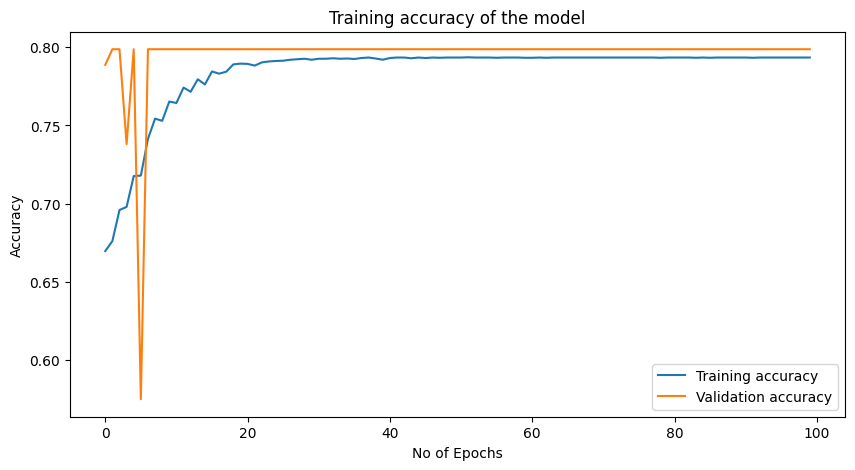

In [560]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],     label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training accuracy of the model')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### OBSERVATIONS:

1. The validation accuracy decreases and then becomes stable.

2. The training accuracy increases and becomes stable.

### Step 12:  Make the prediction, confusion matrix and classification report

In [561]:
Y_pred = (model.predict(X_test) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [562]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Overall Accuracy:", accuracy_score(Y_test, Y_pred)*100.0)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Confusion Matrix:
 [[1607    0]
 [ 393    0]]
Overall Accuracy: 80.35


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Step 13:  Predict for a new customer


In [565]:
sample = np.array([[600, 2, 1, 40, 3, 60000, 2, 1, 1, 50000]])  # Example data


### Transorm the data

transformed_sample = sc.transform(sample)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [566]:
transformed_sample

array([[-0.53598516,  1.50884694,  0.91324755,  0.10479359, -0.69539349,
        -0.25781119,  0.80843615,  0.64920267,  0.97481699, -0.87683221]])

In [567]:
### predict the output

predictions = model.predict(transformed_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [568]:
predictions

array([[0.2069469]], dtype=float32)

In [569]:
print("Prediction:", "Customer will leave" if predictions > 0.5 else "Customer will stay")

Prediction: Customer will stay
